In [55]:
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
from sklearn.metrics import accuracy_score
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt
from colorspacious import cspace_converter
plt.style.use('ggplot')

In [56]:
dataset = pd.read_csv('/home/portable014/Bureau/neelp_1/MAIN_4_PC/Projet/main4_capgemini/pre-traitement/données/stockage_csv/coords_13mots.csv')
#le path est à changer en fonction de l'endroit où on a mis le fichier csv
#ici, il prend un csv pré-enregistré avec 2 mots différents


# Attention : paramètres à changer en fonction du csv

In [57]:
nb_mots = 13 #nombre de classe de mots différents dans le csv

In [58]:
dataset =dataset.fillna(0) #remplace les valeurs manquantes par 0

 

y = dataset[['class']] # vecteur colonne contenant la classe (= le nom du mot)
X = dataset.iloc[:, 1:6001] # matrice contenant toutes les coordonnées d'une vidéo 

#on split les données en données d'entrainements : X_train, y_train et en données de test : X_test et y_test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=27) #on séépare les données en 2 parties : 25% pour le test et 75% pour l'entrainement




In [59]:
## On va tester plusieurs modèles de classification
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier(n_neighbors=nb_mots)))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('SGDC',SGDClassifier(loss="hinge", penalty="l2", max_iter=5)))
models.append(('MPL',MLPClassifier(solver='lbfgs', alpha = 1e-5, hidden_layer_sizes=(15,), random_state=1)))

In [60]:
results = []
names = []
scoring = 'accuracy' #on choisit de tester les modèles en fonction de leur précision 
#on pourrait tester : precision, recall, f1-score, auc, log-loss, ...

for name, model in models:
    print('---------------------------------', name, '---------------------------------------------------')
    clf = model #on prend le modèle
    clf.fit(X_train, y_train)  #on entraine le modèle
    res = sklearn.metrics.accuracy_score(y_test, clf.predict(X_test)) #on teste le modèle
    results.append(res) #on stocke le résultat
    names.append(name) #on stocke le nom du modèle
    msg = "%s: %f (%f)" % (name, res.mean(), res.std()) #on affiche le résultat
    #print(msg)
print(results,names)

--------------------------------- LR ---------------------------------------------------


/home/portable014/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
for i in range(len(results)):
    print(names[i], results[i].mean())


LR 0.9615384615384616
LDA 0.9807692307692307
KNN 0.6730769230769231
CART 0.8461538461538461
NB 0.75
SVM 0.5384615384615384
SGDC 0.34615384615384615
MPL 0.7692307692307693


Text(0.5, 0.98, 'nombre de mots = 13')

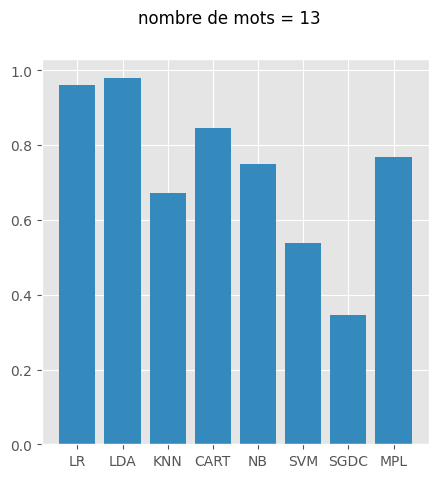

In [ ]:
plt.figure(figsize=(5,5))

plt.subplot(111)
plt.bar(names, results,color='C1')
# plt.subplot(132)
# plt.scatter(names, results)
# plt.subplot(133)
# plt.plot(names, results)
plt.suptitle('nombre de mots = '+str(nb_mots))
# plt.show()

# Enregistrer l'image du plot dans un fichier
plt.savefig('/home/portable014/Bureau/neelp_1/MAIN_4_PC/Projet/main4_capgemini/classificateur/resultats_plots/res_classifier.png')


On enregistre le plot dans un fichier
